### Sample program for grid search of hyper parameters  

#### Import libraries  

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [15]:
csv_in = 'ai-end1-4.csv'

In [16]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(301, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      301 non-null    float64
 1   sex      301 non-null    float64
 2   bmi      301 non-null    float64
 3   bp       301 non-null    float64
 4   s1       301 non-null    float64
 5   s2       301 non-null    float64
 6   s3       301 non-null    float64
 7   s4       301 non-null    float64
 8   s5       301 non-null    float64
 9   s6       301 non-null    float64
 10  disease  301 non-null    float64
dtypes: float64(11)
memory usage: 26.0 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783,259.0
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494,128.0
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633,116.0
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064,196.0
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343,220.0


In [17]:
X = df.loc[:, :'s6']
y = df['disease']
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (301, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343


y: (301,)
0    259.0
1    128.0
2    116.0
3    196.0
4    220.0
Name: disease, dtype: float64


In [18]:
rfr=RandomForestRegressor(random_state=12)            

# Hyperparameter settings for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth' : [2, 4, 6, None],
}

In [19]:
grid_cv = KFold(n_splits=4, shuffle=True, random_state=7)  # for grid search
gen_cv = KFold(n_splits=4, shuffle=True, random_state=12)  # for estimation of generalization performance

In [20]:
gs = GridSearchCV(rfr, param_grid , cv=grid_cv, scoring='neg_mean_squared_error')

In [21]:
%%time
nested_score = cross_val_score(gs, X=X, y=y, cv=gen_cv,
                               scoring='neg_mean_squared_error')
print(nested_score)
print(np.sqrt(-nested_score.mean()))

[-3790.8444664  -2868.76121496 -3418.89170284 -2853.43466405]
56.85932651785534
Wall time: 11.2 s


In [22]:
%%time
gs.fit(X, y)
gs_best = gs.best_estimator_

Wall time: 2.95 s


In [23]:
print(gs_best)

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=12)


In [24]:
print(pd.Series(gs_best.feature_importances_, index=X.columns))

age    0.035387
sex    0.002552
bmi    0.370686
bp     0.073733
s1     0.014748
s2     0.024142
s3     0.016405
s4     0.008088
s5     0.398985
s6     0.055275
dtype: float64


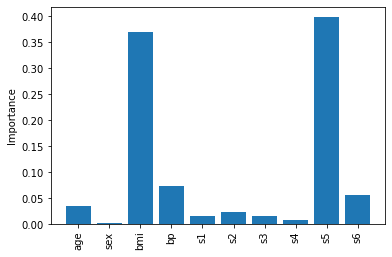

In [25]:
plt.bar(X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()